**Link to the dataset**: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
# from statsmodels.graphics.gofplots importqqplot
from sklearn.linear_model import LogisticRegression
import math

In [41]:
df = pd.read_csv('/data/notebook_files/CVD_cleaned.csv')

In [42]:
# Binary columns transformation

df['Heart_Disease'] = df['Heart_Disease'].map({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].map({'Female': 1, 'Male': 0})

In [43]:
# Dropping columns we don't need

df.drop(columns=['Age_Category','General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes',
                 'Arthritis', 'Smoking_History', 'Fruit_Consumption', 'Green_Vegetables_Consumption',
                 'FriedPotato_Consumption', 'Weight_(kg)', 'Height_(cm)'], inplace=True)
df.head()

,Heart_Disease,Sex,BMI,Alcohol_Consumption
0,0,1,14.54,0.0
1,1,1,28.29,0.0
2,0,1,33.47,4.0
3,1,0,28.73,0.0
4,0,0,24.37,0.0


# PART 1

## Q1. 
Our research question is: What is the effect of alcohol consumption, sex, and having heart disease on BMI?


## Q2

In [44]:
# q2
np.random.seed(100)
df_sampled = df.sample(200)

## Q3

### א+ב Variables summary:

**BMI:**

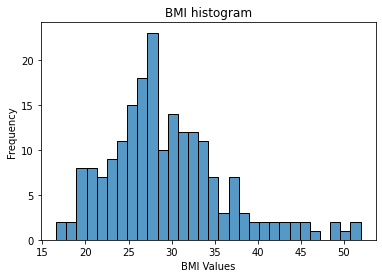

In [45]:
sns.histplot(data=df_sampled, x='BMI', bins=30)

plt.title('BMI histogram')
plt.xlabel('BMI Values')
plt.ylabel('Frequency')

plt.show()

The histogram of BMI values does exhibit some characteristics of a normal distribution, but there appears to be a longer tail on the right side of the distribution, suggesting that there are more individuals with higher BMI values than what would be expected in a normal distribution. 

**Alcohol consumption:**

We'd like to note that the values within this variable, though they are integers ranging from 0 to 30, likely represent estimations rather than precise quantities. This inference is drawn from the observation that figures like 10, 20, and 30 have notably higher frequencies compared to adjacent values, suggesting that respondents provided rounded estimates of their consumption. Based on this pattern, we will treat this variable as continuous, acknowledging the inherent variability in the data.

In [46]:
unique_values = df_sampled['Alcohol_Consumption'].unique()

print(f"Unique alcohol consumption values: {unique_values}")

print(df_sampled["Alcohol_Consumption"].describe())

Unique alcohol consumption values: [30.  8.  2. 12.  0.  4. 20.  3. 28.  5.  1. 29.  7. 25. 15. 24. 10. 16.
 23. 18.  6.]
count    200.000000
mean       5.345000
std        8.374163
min        0.000000
25%        0.000000
50%        2.000000
75%        8.000000
max       30.000000
Name: Alcohol_Consumption, dtype: float64


Although the values in the 'Alcohol_Consumption' column are whole numbers between [0,30], we will refer to this variable as continious.

Text(0.5, 1.0, 'Alcohol Consuming Distribution')

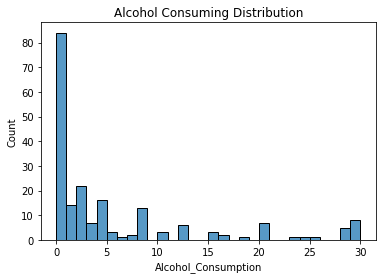

In [47]:
sns.histplot(x='Alcohol_Consumption', data=df_sampled, multiple='stack', bins=30).set_title('Alcohol Consuming Distribution')

The histogram for Alcohol Consumption Distribution shows that the majority of observations are clustered at the lower end of the scale, with the highest frequency at the very first bin (near 0).  ButThere are also few counts as we move towards the higher end of the alcohol consumption scale (around 25 to 30 units). These could be considered outliers or simply represent a small proportion of the population that consumes alcohol at high levels. These characteristics make it hard to estimate the variable's distribution, but it does resemble an exponential distribution.


**Gender:**

In [48]:
sex_df = df_sampled.groupby("Sex", as_index = False).size().rename(columns={"size": "number of participantes"}).set_index(["Sex"])
sex_df["Sex"] = ["Male", "Female"]
sex_df = sex_df.set_index(["Sex"])
sex_df
# 'Female': 1, 'Male': 0}

,number of participantes
Sex,
Male,95
Female,105


We can see that there are about the same amount of males and females. Based on prior knowledge, we know that the gender distribution is approximately Bernoulli(0.5).

**Heart disease:**

In [49]:
have_heart_disease_df = df_sampled.groupby("Heart_Disease", as_index = False).size().rename(columns={"size": "number of participants"}).set_index(["Heart_Disease"])
have_heart_disease_df["Heart_Disease"] = ["No", "Yes"]
have_heart_disease_df = have_heart_disease_df.set_index(["Heart_Disease"])
have_heart_disease_df

,number of participants
Heart_Disease,
No,177
Yes,23


We can see that about 11% of the participants have heart disease. So we can estimate that the variable is distributed Bernoulli(0.11).

In [50]:
#q1.3.b Checking for missing data
df_sampled.isnull().sum()

Heart_Disease 0
Sex 0
BMI 0
Alcohol_Consumption 0
dtype: int64

We can see that there is no missing data in the dataset.

### ג

Values for Alcohol_Consumption:
210943    30.0
83068      8.0
122276     2.0
129725    12.0
60669     12.0
          ... 
272939    20.0
218054    20.0
163112    15.0
48395      3.0
194230    20.0
Name: Alcohol_Consumption, Length: 200, dtype: float64
Spearman's rank correlation coefficient between Alcohol_Consumption and BMI: -0.161722585159785
P-value for hypothesis test where null hypothesis is no correlation: 0.022146355066422086




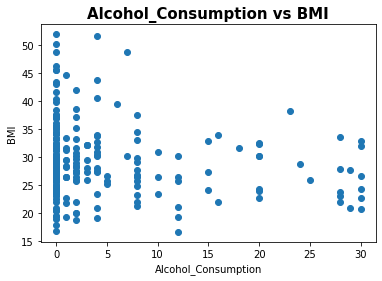

In [51]:
def plot_relationship_between_variables(variable_pair, dataframe):
    """
    This function plots the relationship between two variables and calculates the Spearman's rank correlation coefficient.
    """

    independent_variable = variable_pair[0]
    dependent_variable = variable_pair[1]
    
    # Displaying the independent variable values
    print(f"Values for {independent_variable}:\n{dataframe[independent_variable]}")
    
    # Calculating Spearman's rank correlation coefficient
    spearman_coefficient, p_value = stats.spearmanr(dataframe[independent_variable], dataframe[dependent_variable])
    print(f"Spearman's rank correlation coefficient between {independent_variable} and {dependent_variable}: {spearman_coefficient}")
    print(f"P-value for hypothesis test where null hypothesis is no correlation: {p_value}\n")
    
    # Plotting the data
    plt.scatter(dataframe[independent_variable], dataframe[dependent_variable])
    plt.title(f"{independent_variable} vs {dependent_variable}", size=15, fontweight="bold")
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)
    plt.show()
    print()

for variable_pair in [['Alcohol_Consumption', 'BMI']]:
    plot_relationship_between_variables(variable_pair, df_sampled)


There does not appear to be a clear or strong pattern indicating a linear relationship between alcohol consumption and BMI. The points are fairly dispersed across all levels of alcohol consumption, suggesting a weak correlation, if any.

### ד

83068     27.71
136641    43.76
49549     40.61
131283    30.13
126517    32.19
          ...  
234473    39.53
172443    26.50
35039     29.65
246271    28.89
194230    30.17
Name: BMI, Length: 95, dtype: float64
210943    26.63
83068     27.71
129725    25.77
60669     30.11
159434    37.12
          ...  
272939    23.91
218054    22.66
163112    27.32
48395     32.22
194230    30.17
Name: BMI, Length: 177, dtype: float64


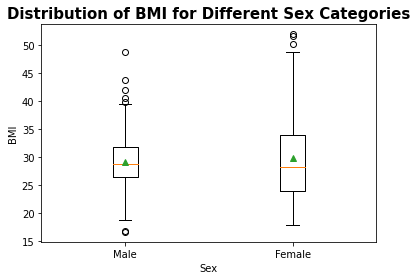

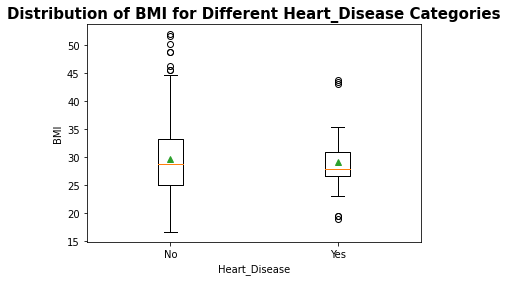

In [52]:
def plot_categorical_boxplot(category_column, numeric_column, dataframe):
    # Prepare data for the two categories
    category_data_1 = dataframe[dataframe[category_column] == 1][numeric_column]
    category_data_0 = dataframe[dataframe[category_column] == 0][numeric_column]
    print(category_data_0)

    # Create boxplot
    boxplot_data = [category_data_0, category_data_1]  # Reordered to match the labels 0, 1
    plt.boxplot(boxplot_data, showmeans=True)

    # Title and labels
    plt.title(f"Distribution of {numeric_column} for Different {category_column} Categories", size=15, fontweight="bold")
    plt.xlabel(category_column)
    plt.ylabel(numeric_column)

    # Set custom labels for x-ticks
    if category_column == 'Sex':
        plt.xticks([1, 2], ['Male', 'Female']) 
    else:
        plt.xticks([1, 2], ['No', 'Yes'])  # Adjusted to label the categories as 0 and 1 instead of 1 and 2

    # Display the plot
    plt.show()

category_columns = ['Sex', 'Heart_Disease']
for category in category_columns:
    plot_categorical_boxplot(category, 'BMI', df_sampled)

From the boxplots, we can see that there’s a wider range of BMI scores in women compared to men. This suggests women’s BMI scores vary more. The plot also has quite a few high BMI scores for women, showing up as outliers. This suggests that sex may have some effect on the BMI.

For heart disease, people without it have BMI scores that spread out more than those with heart disease. This wider spread could mean there’s more variety in the BMIs of people without heart disease. However, the group with heart disease seems smaller since there are fewer outliers, and that might be why there’s less variation in BMI among them compared to those without heart disease. When we consider the effect of sample size, it's possible that the smaller number of people with heart disease might be skewing the results a bit.

## Q4

In [53]:
#Q4

# Preparing the data
# X contains the independent variables 'Alcohol_Consumption', 'Sex', and 'Heart_Disease'
X = df_sampled[['Alcohol_Consumption', 'Sex', 'Heart_Disease']].to_numpy()

# y contains the dependent variable 'BMI'
Y = df_sampled['BMI'].to_numpy()

# Adding a column of ones to X for the intercept term
X_with_intercept = np.c_[np.ones(X.shape[0]), X]

# Calculating the OLS (Ordinary Least Squares) coefficients
# Step 1: Compute the transpose of X multiplied by X
X_transpose_X = np.matmul(X_with_intercept.T, X_with_intercept)

# Step 2: Calculate the inverse of X_transpose_X
inverse_X_transpose_X = np.linalg.inv(X_transpose_X)

# Step 3: Compute the transpose of X multiplied by y
X_transpose_y = np.matmul(X_with_intercept.T, Y)

# Step 4: Calculate the OLS coefficients by multiplying the inverse of X_transpose_X and X_transpose_y
ols_coefficients = np.matmul(inverse_X_transpose_X, X_transpose_y)

# Display the OLS coefficients
print(f"OLS coefficients = {ols_coefficients} \n")

# Constructing and displaying the linear model equation
print("The linear model is: ")
print("BMI = ", end="")
for i, coef in enumerate(ols_coefficients):
    if i != len(ols_coefficients) - 1:
        print(f"{coef:.3f} * x_{i} + ", end="") if i != 0 else print(f"{coef:.3f} + ", end="")
    else:
        print(f"{coef:.3f} * x_{i} \n")
print("***********")
# Explaining the variables
print("Variables meaning: ")
variable_names = ['Alcohol_Consumption', 'Sex', 'Heart_Disease']
for i, name in enumerate(variable_names):
    print(f"x{i+1} = {name}")

OLS coefficients = [30.10111015 -0.14255937  0.47326118 -0.56602097] 

The linear model is: 
BMI = 30.101 + -0.143 * x_1 + 0.473 * x_2 + -0.566 * x_3 

***********
Variables meaning: 
x1 = Alcohol_Consumption
x2 = Sex
x3 = Heart_Disease


The OLS coefficients represent the relationship between the independent variables and the dependent variable in a linear regression model, explained as follows:

1. **Intercept ($\beta_0$):** This coefficient indicates the expected value of the dependent variable $Y$ when all independent variables $X$ are 0. It's the point where the regression line crosses the Y-axis.

2. **Slope Coefficients ($\beta_1, \beta_2, ..., \beta_k$):** Each of these coefficients corresponds to one independent variable in the model. A slope coefficient $\beta_i$ indicates the expected change in the dependent variable $Y$ for a one-unit increase in the corresponding independent variable $X_i$, holding all other variables constant.

### What happens when increasing a variable by 1 unit?

We learned that in linear regression, if you increase an independent variable $X_i$ by 1 unit, the dependent variable $Y$ is expected to change by $\beta_i$ units, assuming all other variables remain constant. 


## q5

In [54]:
num_observations = df_sampled['BMI'].shape[0]
X = X_with_intercept
num_independent_vars = len(['Alcohol_Consumption', 'Sex', 'Heart_Disease'])

# Total number of parameters (including the intercept)
num_parameters = num_independent_vars + 1

# Predicted BMI values using the linear model
predicted_BMI = np.matmul(X, ols_coefficients)

# Actual BMI values
actual_BMI = df_sampled['BMI'].to_numpy()

# Mean of actual BMI values
mean_BMI = np.mean(actual_BMI)

# Sum of Squares for Regression (explained variation)
SSR = sum([(predicted_BMI[i] - mean_BMI) ** 2 for i in range(predicted_BMI.shape[0])])

# Sum of Squares for Residuals (unexplained variation)
SSRES = sum([(actual_BMI[i] - predicted_BMI[i]) ** 2 for i in range(actual_BMI.shape[0])])

# Total Sum of Squares (total variation)
SST = sum([(actual_BMI[i] - mean_BMI) ** 2 for i in range(actual_BMI.shape[0])])

# Mean Square for Regression
mean_square_regression = SSR / num_independent_vars

# Mean Square for Residuals
mean_square_residuals = SSRES / (num_observations - num_parameters)

# Mean Square Total
mean_square_total = SST / (num_observations - 1)

# F statistic and p-value for the regression model significance
F_statistic = mean_square_regression / mean_square_residuals
n= 200
p = 4
k = p-1
p_value=1-stats.f.cdf(F_statistic,k,n-p)
# Consructing the ANOVA table
anova_table = pd.DataFrame({
    "Sum of Squares": [SSR, SSRES, SST],
    "Degrees of Freedom": [num_independent_vars, num_observations - num_parameters, num_observations - 1],
    "Mean Square": [mean_square_regression, mean_square_residuals, mean_square_total],
    "F statistic": [f"{F_statistic}, p-value = {p_value}", "", ""],
}, index=["Regression", "Residuals/Errors", "Total"])


display(anova_table)

r_squared = SSR / SST
adjusted_r_squared = 1 - (mean_square_residuals / mean_square_total)
print(f"\nR^2: {r_squared}")
print(f"Adjusted R^2: {adjusted_r_squared}")


R^2: 0.0329792887390837
Adjusted R^2: 0.01817795132182498


,Sum of Squares,Degrees of Freedom,Mean Square,F statistic
Regression,310.345916,3,103.448639,"2.228128973036491, p-value = 0.08619444908921825"
Residuals/Errors,9099.981834,196,46.428479,
Total,9410.327750,199,47.288079,


## Q6

In [55]:
import numpy as np
from scipy.stats import norm

# Extract features and target from the dataframe
X_original = df[['Alcohol_Consumption', 'Sex', 'Heart_Disease']].values
Y_original = df['BMI'].values

# Add a constant column to the feature set for the intercept
X_original = np.concatenate([np.ones((X_original.shape[0], 1)), X_original], axis=1)

# Calculate OLS coefficients using linear algebra
X_transpose_X = np.dot(X_original.T, X_original)
inverse_X_transpose_X = np.linalg.inv(X_transpose_X)
X_transpose_y = np.dot(X_original.T, Y_original)
original_coefficients = np.dot(inverse_X_transpose_X, X_transpose_y)

# Display the coefficients in a formatted model
print("OLS Coefficients for original data:", original_coefficients)
print("\nThe linear model is:")
print(f"y = {' + '.join(f'{coeff:.2f} * x_{i}' for i, coeff in enumerate(original_coefficients))}")
print("***********")
# Associate coefficients with their respective variables
print("\nVariable mapping:")
variable_mapping = ['Intercept', 'Alcohol_Consumption', 'Sex', 'Heart_Disease']
for i, variable in enumerate(variable_mapping):
    print(f"x_{i} corresponds to {variable}")
print("***********")
# Compute and display confidence intervals for coefficients
confidence_intervals = []
residuals = Y - np.dot(X, ols_coefficients)
residuals_squared = residuals**2
sigma_squared = residuals_squared.sum() / (X.shape[0] - X.shape[1])
confidence_level = 0.95
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

print("\nConfidence Intervals:")
for i in range(len(original_coefficients)):
    standard_error = np.sqrt(sigma_squared * np.linalg.inv(np.dot(X.T, X))[i, i])
    margin_error = z_score * standard_error
    confidence_interval = (ols_coefficients[i] - margin_error, ols_coefficients[i] + margin_error)
    print(f"CI for {variable_mapping[i]}: {confidence_interval}, Original data estimator: {original_coefficients[i]}")
    confidence_intervals.append(confidence_interval)
    print(f"Is the beta estimator from the full data for {variable_mapping[i]} inside the the CI based on the sample data? {original_coefficients[i] >= confidence_interval[0] and original_coefficients[i] <= confidence_interval[1]}")
    print("***********")

OLS Coefficients for original data: [29.15429033 -0.08769409 -0.29445336  0.88518992]

The linear model is:
y = 29.15 * x_0 + -0.09 * x_1 + -0.29 * x_2 + 0.89 * x_3
***********

Variable mapping:
x_0 corresponds to Intercept
x_1 corresponds to Alcohol_Consumption
x_2 corresponds to Sex
x_3 corresponds to Heart_Disease
***********

Confidence Intervals:
CI for Intercept: (28.473704213288944, 31.728516089250572), Original data estimator: 29.154290334443182
Is the beta estimator from the full data for Intercept inside the the CI based on the sample data? True
***********
CI for Alcohol_Consumption: (-0.2564402406471024, -0.028678508769503466), Original data estimator: -0.08769408567641124
Is the beta estimator from the full data for Alcohol_Consumption inside the the CI based on the sample data? True
***********
CI for Sex: (-1.4447941043521215, 2.3913164588086513), Original data estimator: -0.2944533553574322
Is the beta estimator from the full data for Sex inside the the CI based on the

## Q7

To test whether each of the OLS coefficients ($\beta_i$) is significantly different from zero, we will use a F test. The null and alternative hypotheses for each coefficient are formulated as follows:


**$H_0$:**     $\beta_1^* = \ldots = \beta_k^* = 0$.

**$H_1$:**     $\beta_1^* \neq 0 \vee \ldots\vee  \beta_k^* \neq 0$.


### Test Statistic:

$$
F = \frac{MSR}{MS_{Res}}
$$

Where:
- $MSR$ (Mean Square Regression) is the mean squared due to the regression (explained variance).
- $MS_{Res}$ (Mean Square Residual) is the mean squared due to the residuals (unexplained variance).

We reject the null hypothesis If $F > F_{\alpha,k,n-p}$, where $\alpha$ is the significance level. In our case we have n=200, p = 4 (number of coefficients), k = p - 1 = 3 (number of independent variables).

In [56]:
#Q7
n = 200
p = 4
k = p - 1
alpha = 0.05
dof = n - p
# F statistic and p-value for the regression model significance
F_statistic = mean_square_regression / mean_square_residuals
p_value = 1 - stats.f.cdf(F_statistic, num_independent_vars, dof)

quantile = stats.f.ppf(alpha, k, dof)
print(f"P-value : {p_value}")
print(f"Should we reject H0? : {p_value < alpha}")

P-value : 0.08619444908921825
Should we reject H0? : False


## Q8

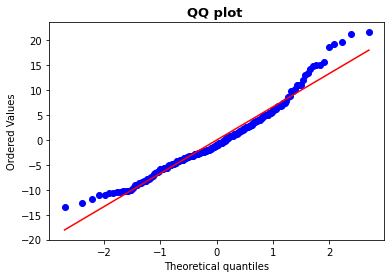

In [57]:
#q8

res = Y - predicted_BMI

# Generate a Q-Q plot
stats.probplot(res, dist="norm", plot=plt, fit=True)

plt.title("QQ plot ", fontsize=13, fontweight="bold")
plt.show()

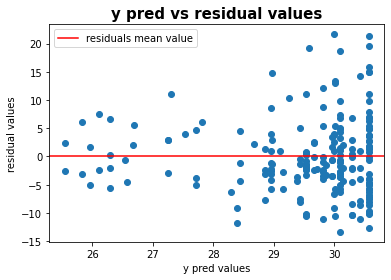

In [58]:
# Creating a scatter plot of predicted values vs residuals
plt.scatter(predicted_BMI, res)

# Adding a horizontal line at the mean of the residuals
plt.axhline(y=res.mean(), color="red", label="residuals mean value")

# Labeling the x-axis
plt.xlabel("y pred values")

# Labeling the y-axis
plt.ylabel("residual values")

# Adding a title and configuring its appearance
plt.title("y pred vs residual values", fontweight="bold", fontsize=15)

# Adding a legend to the plot
plt.legend()

# Displaying the plot
plt.show()

To evaluate the assumptions of a linear regression model, we can use graphical tools like residual plots and Q-Q plots:

1. **Assumption of Linearity:** Looking at the residual plot, we can't see a clear pattern. The data is symmetrical around the Y axis. Therefore this assumption holds.

2. **Assumption of Equal Variances (Homoscedasticity):** This is assessed by looking for a "funnel" shape in the residual plot. A funnel shape would indicate heteroscedasticity, where the residuals' variance changes across the levels of the independent variables. Looking at the residual plot, it is hard to give a definite answer because we have more data points in higher BMI predictions region, there seems to be a funnel shape, which means this assumption doesn't necessarily hold.
3. **Assumption of Normality:** The QQ plot shows that the assumption that the noise is normally distributed is not exactly true (especially at both ends), but could be close enough for our model.

## Q9

In [59]:
df_all = df.merge(df_sampled, how='left', indicator=True)
not_in_sampled = df_all[df_all["_merge"] == "left_only"]
df_sampled_1000 = not_in_sampled.sample(1000).drop("_merge", axis=1)

### א

In [60]:
X_1000 = df_sampled_1000[['Alcohol_Consumption', 'Sex', 'Heart_Disease']].to_numpy()
X_1000 = np.c_[np.ones(X_1000.shape[0]), X_1000]
Y_1000 = np.matmul(X_1000, ols_coefficients)

### ב ו-ג

In [61]:
n = 1000
y_actual = df_sampled_1000['BMI'].to_numpy()
residuals = y_actual - Y_1000  
variance_estimate = np.sum(residuals**2) / (n - p) 

count_within_confidence_interval = 0

for i in range(1000):
    y_i = Y_1000[i] 
    hat_m = np.matmul(X_1000[i], np.matmul(inverse_X_transpose_X, X_1000[i].T))  # Leverage of the i-th observation
    ci_width = stats.norm.ppf(0.975) * np.sqrt(variance_estimate * (1 + hat_m))  # CI width for the i-th prediction

    CI_lower = y_i - ci_width
    CI_upper = y_i + ci_width

    if CI_lower <= y_actual[i] <= CI_upper:
        count_within_confidence_interval += 1

percentage_within_CI = round((count_within_confidence_interval / n) * 100,1)
print(f"Actual values appeared in the confidence interval {percentage_within_CI}% of the time.")

Actual values appeared in the confidence interval 95.7% of the time.


Our result is close to the 95% mark, which means that the linear regression model does seem to fit the data, and it is reliable in the sense that its predictions, along with the associated confidence intervals, consistently contains the true observed values.

## Q10

In [62]:
# Extracting independent variables and dependent variable
x_1 = df_sampled['Alcohol_Consumption'].to_numpy()
x_2 = df_sampled['Sex'].to_numpy()
x_3 = df_sampled['Heart_Disease'].to_numpy()
y = df_sampled['BMI'].to_numpy()

# Creating interaction terms
x_1_2 = np.multiply(x_1, x_2)
x_1_3 = np.multiply(x_1, x_3)
x_2_3 = np.multiply(x_2, x_3)

# Assembling the design matrix with interaction terms
X_inter = np.c_[X, x_1_2, x_1_3, x_2_3]

# Performing OLS regression with interaction terms
xTx_inter = np.matmul(X_inter.T, X_inter)
xTx_inter_inv = np.linalg.inv(xTx_inter)
xTy_inter = np.matmul(X_inter.T, y)
ols_inter = np.matmul(xTx_inter_inv, xTy_inter)
y_pred_inter=np.matmul(X_inter,ols_inter)
print("OLS coefficients with interaction terms:")
print(f"beta_0 = {ols_inter[0]:.3f}")  # Intercept
print(f"beta_1 = {ols_inter[1]:.3f}")  # x_1
print(f"beta_2 = {ols_inter[2]:.3f}")  # x_2
print(f"beta_3 = {ols_inter[3]:.3f}")  # x_3
print(f"beta_1_2 = {ols_inter[4]:.3f}")  # Interaction x_1_x_2
print(f"beta_1_3 = {ols_inter[5]:.3f}")  # Interaction x_1_x_3
print(f"beta_2_3 = {ols_inter[6]:.3f}")  # Interaction x_2_x_3

# Printing the model with x notation and interaction terms
print("\nThe model equation with x notation is: ")
print("y = ", end="")
labels = ["x0", "x1", "x2", "x3", "x1x2", "x1x3", "x2x3"]
for i, label in enumerate(labels):
    print(f"{ols_inter[i]:.3f}*{label}" + (" + " if i != len(ols_inter) - 1 else ""), end=" ")

# Printing the model with actual variable names and interaction terms
variable_names = ["Intercept", "Alcohol_Consumption", "Sex", "Heart_Disease", 
                  "Alcohol_Consumption*Sex", "Alcohol_Consumption*Heart_Disease", "Sex*Heart_Disease"]
print("\n\nThe model with actual variable names is: ")
print("BMI = ", end="")
for i, name in enumerate(variable_names):
    print(f"{ols_inter[i]:.3f}*{name}" + (" + " if i != len(variable_names) - 1 else ""), end=" ")

OLS coefficients with interaction terms:
beta_0 = 30.111
beta_1 = -0.124
beta_2 = 0.587
beta_3 = -2.062
beta_1_2 = -0.066
beta_1_3 = 0.119
beta_2_3 = 2.578

The model equation with x notation is: 
y = 30.111*x0 +  -0.124*x1 +  0.587*x2 +  -2.062*x3 +  -0.066*x1x2 +  0.119*x1x3 +  2.578*x2x3 

The model with actual variable names is: 
BMI = 30.111*Intercept +  -0.124*Alcohol_Consumption +  0.587*Sex +  -2.062*Heart_Disease +  -0.066*Alcohol_Consumption*Sex +  0.119*Alcohol_Consumption*Heart_Disease +  2.578*Sex*Heart_Disease 

In [63]:
def calculate_mallows_cp(y_actual, y_predicted, p):
    """
    Calculate Mallows' Cp statistic for model evaluation.
    """
    n = len(y_actual)
    RSS = np.sum((y_actual - y_predicted)**2)
    res = y_actual-y_predicted
    var_estimate = 1/(n-p)*sum([x**2 for x in res])
    Cp = RSS + 2 * p * var_estimate
    return Cp

def calculate_aic(y_actual, y_predicted, p):
    """
    Calculate Akaike Information Criterion (AIC) for model evaluation.
    """
    n = len(y_actual)
    RSS = np.sum((y_actual - y_predicted)**2)
    AIC = n * np.log(RSS / n) + 2 * p
    return AIC


# 3 predictors (Alcohol_Consumption, Sex, Heart_Disease) + 1 intercept
p_model1 = 4
# 3 predictors + 3 interaction terms + 1 intercept
p_model2 = 7
Cp_model1 = calculate_mallows_cp(y, predicted_BMI, p_model1)
AIC_model1 = calculate_aic(y, predicted_BMI, p_model1)

Cp_model2 = calculate_mallows_cp(y, y_pred_inter, p_model2)
AIC_model2 = calculate_aic(y, y_pred_inter, p_model2)


# Output the results
print(f"Model 1 (Without Interactions): Cp = {Cp_model1}, AIC = {AIC_model1}")
print(f"Model 2 (With Interactions): Cp = {Cp_model2}, AIC = {AIC_model2}")


Model 1 (Without Interactions): Cp = 9471.409663962659, AIC = 771.5420659383086
Model 2 (With Interactions): Cp = 9689.027180410978, AIC = 776.080666951605


The comparison reveals that, according to Mallows' Cp statistic (which we want to minimize), Model 1 (which includes interaction terms) outperforms Model 2 (lacking interaction terms).We can also see that according to the AIC score (which we want to maximize), there is a preference for Model 1 over Model 2. 

Therefore model 1 is superior.

# חלק שני – רגרסיה לוגיסטית

## Q1

**Our research question is:** How does alcohol consumption, BMI, and gender affect heart disease?

## Q2

In [64]:
df2 = df.copy(deep=True)

# df2.drop(columns=['Age_Category'], inplace=True)
desired_order = ['Sex', 'BMI','Alcohol_Consumption', 'Heart_Disease']
df2 = df2[desired_order]

np.random.seed(7878)
df2_sampled = df2.sample(200)
df2_sampled.head()

,Sex,BMI,Alcohol_Consumption,Heart_Disease
54559,0,27.89,15.0,0
232285,1,25.61,0.0,0
170354,1,24.51,4.0,0
174040,1,26.63,28.0,0
34685,0,27.89,2.0,0


## Q3

### א+ב
We used the same variables as part 1.

### ג

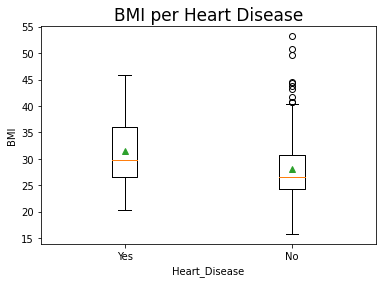

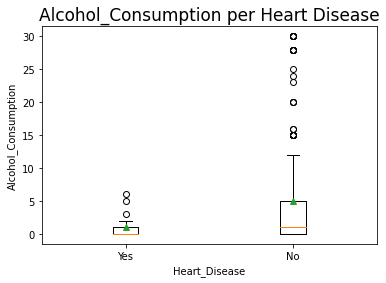

In [65]:
def box_plot(y_column, df):
    plt.boxplot([df[df["Heart_Disease"] == 1][y_column], df[df["Heart_Disease"] == 0][y_column]], showmeans=True, labels = ["Yes", "No"])
    plt.title(f"{y_column} per Heart Disease", size=17)
    plt.xlabel("Heart_Disease")
    plt.ylabel(y_column)
    plt.plot()
    plt.show()


for y_column in ['BMI','Alcohol_Consumption']:
    box_plot(y_column, df2_sampled)

The alcohol consumption boxplot for people with heart disease is a bit problematic (because of the lack of samples in that category), so we want to use a histogram to see the full picture.

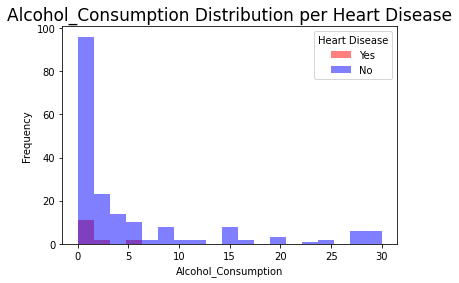

In [66]:

def hist_plot(y_column, df):
    # Define the bins for the histogram
    bins = np.linspace(min(df[y_column]), max(df[y_column]), 20)

    # Plot the histogram for individuals with heart disease
    plt.hist(df[df["Heart_Disease"] == 1][y_column], bins, alpha=0.5, label='Yes', color='red')

    # Plot the histogram for individuals without heart disease
    plt.hist(df[df["Heart_Disease"] == 0][y_column], bins, alpha=0.5, label='No', color='blue')

    # Adding plot titles and labels
    plt.title(f"{y_column} Distribution per Heart Disease", size=17)
    plt.xlabel(y_column)
    plt.ylabel('Frequency')
    
    # Adding a legend to differentiate the two histograms
    plt.legend(title='Heart Disease')

    # Display the plot
    plt.show()


hist_plot('Alcohol_Consumption', df2_sampled)

We can see that in our sample, all of the people with heart disease consume little or no alcohol.

It's hard to decide which of 2 variables have more impact on heart disease, as we don't have a lot of data of people with heart disease in our sample. It appears that people with heart disease consume more alcohol (based on the average, median and upper whisker).

## Q4

In [67]:
x_list =['Sex', 'BMI', 'Alcohol_Consumption']
y_title= 'Heart_Disease'

In [68]:
# Prepare the feature matrix X of the sampled data by selecting specific variables and adding an intercept term.
X = df2_sampled[x_list].to_numpy()
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to represent the intercept.

# Prepare the target variable array y.
y = df2_sampled[y_title].to_numpy()

# Fit a logistic regression model without regularization (penalty='none') and without fitting the intercept (already included).
model = LogisticRegression(penalty=None, fit_intercept=False).fit(X, y)

# Retrieve the estimated coefficients from the model.
beta_est = model.coef_[0]
print(f"Coefficients: {beta_est}")

# Display the logistic model equation in a human-readable format.
print("The logistic model equation is: ")
print("Heart_Disease = ", end="")
for i, coef in enumerate(beta_est):
    # Format the intercept separately from the other coefficients.
    if i == 0:
        print(f"{coef:.3f} + ", end="")
    elif i == len(beta_est) - 1:
        print(f"{coef:.3f} * x_{i}")
    else:
        print(f"{coef:.3f} * x_{i} + ", end="")

# Provide an interpretation for the coefficients in terms of change in log-odds.
print("\nInterpretation of the coefficients (change in log-odds):")
for i in range(1, len(beta_est)):
    # Explain how a one-unit change in each feature affects the odds ratio.
    print(f"If we increase x{i-1} by 1 unit, the odds multiply by a factor of: {np.exp(beta_est[i]):.5f}")

Coefficients: [-3.55704603 -0.39566336  0.05415845 -0.16197259]
The logistic model equation is: 
Heart_Disease = -3.557 + -0.396 * x_1 + 0.054 * x_2 + -0.162 * x_3

Interpretation of the coefficients (change in log-odds):
If we increase x0 by 1 unit, the odds multiply by a factor of: 0.67323
If we increase x1 by 1 unit, the odds multiply by a factor of: 1.05565
If we increase x2 by 1 unit, the odds multiply by a factor of: 0.85046


For logistic regression, the $\beta$ coefficients relate the independent variables to the log odds of the dependent variable. Their interpretations are as follows:

1. Intercept ($\beta_0$): This coefficient represents the log odds of the dependent variable $Y$ when all the independent variables $X$ are at their zero level.

2. Slope Coefficients ($\beta_1, \beta_2, \ldots, \beta_k$): These coefficients correspond to the independent variables in the model. A coefficient $\beta_i$ represents the expected change in the log odds of the dependent variable $Y$ for a one-unit increase in the independent variable $X_i$, assuming all other variables are held constant.

Effect of Increasing a Variable by One Unit:

If you increase an independent variable $X_i$ by 1 unit, while holding other variables constant, the log odds of $Y$ are expected to change by $\beta_i$ units.
In terms of the probability of $Y$, for a one-unit increase in $X_i$, the odds of $Y$ occurring are multiplied by $e^{\beta_i}$, known as the odds ratio (OR).

## Q5

In [69]:
def calculate_pi(i,X):
    # For building the Covariance matrix
    bT_Xi = np.matmul(beta_est.T, X[i])
    return np.exp(bT_Xi) / (1 + np.exp(bT_Xi))

#find the beta coeffients for the original data.
X_original = df2[x_list].to_numpy()
X_original = np.c_[np.ones(X_original.shape[0]), X_original]  # Add intercept term.
Y_original = df2[y_title].to_numpy()
model_original = LogisticRegression(penalty=None, fit_intercept=False).fit(X_original, Y_original)
beta_est_original = model_original.coef_[0]

# Compute the diagonal elements for the variance-covariance matrix of the sample data.
diagonal = [calculate_pi(i,X) * (1 - calculate_pi(i,X)) for i in range(X.shape[0])]

# Calculate the variance-covariance matrix for the sampled data.
V = np.diag(diagonal)
C = np.linalg.inv(X.T @ V @ X)

# Get the z-score for a 95% confidence interval.
norm_quantile = stats.norm.ppf(0.975)

# Iterate through each coefficient (of the sampled data) to calculate and display its confidence interval
for i, variable in zip(range(beta_est_original.shape[0]), ['Intercept (beta_0)'] + x_list):
    std_estimate = np.sqrt(C[i][i])
    CI_lower = beta_est[i] - norm_quantile * std_estimate
    CI_upper = beta_est[i] + norm_quantile * std_estimate
    print(f"Confidence Interval (95%) for {variable}: [{CI_lower:.3f}, {CI_upper:.3f}]. Original estimator: {beta_est_original[i]}")

    # Check and display whether the CI includes the original estimator.
    print(f"Is the original estimator within the CI for {variable}? {CI_lower <= beta_est_original[i] <= CI_upper}\n")
    print('******************')

Confidence Interval (95%) for Intercept (beta_0): [-5.949, -1.165]. Original estimator: -2.6480974631736425
Is the original estimator within the CI for Intercept (beta_0)? True

******************
Confidence Interval (95%) for Sex: [-1.487, 0.695]. Original estimator: -0.5816555470713388
Is the original estimator within the CI for Sex? True

******************
Confidence Interval (95%) for BMI: [-0.019, 0.127]. Original estimator: 0.020144876518576178
Is the original estimator within the CI for BMI? True

******************
Confidence Interval (95%) for Alcohol_Consumption: [-0.381, 0.057]. Original estimator: -0.02145467978888308
Is the original estimator within the CI for Alcohol_Consumption? True

******************


## Q6

**The full calculation of the test statistic and the test details can be found in this link:**

https://drive.google.com/file/d/1Ckp-Zur1U9tXAeqSoIKnc2lxiiNveJYT/view?usp=sharing

In [70]:
# building the dataset with interaction terms 
x_1 = df2_sampled['Sex'].to_numpy()
x_2 = df2_sampled['BMI'].to_numpy()
x_3 = df2_sampled['Alcohol_Consumption'].to_numpy()
y = df2_sampled['Heart_Disease'].to_numpy()

# making interactions
x_1_2 = np.multiply(x_1,x_2)
x_1_3 = np.multiply(x_1,x_3)
x_2_3 = np.multiply(x_2,x_3)
interaction_terms = [x_1_2, x_1_3,x_2_3]

interactions_df = df2_sampled[x_list].copy()
interactions_df["Sex&BMI"] = x_1_2
interactions_df["Sex&Alcohol_Consumption"] = x_1_3
interactions_df["BMI&Alcohol_Consumption"] = x_2_3    

interactions_df.head()

,Sex,BMI,Alcohol_Consumption,Sex&BMI,Sex&Alcohol_Consumption,BMI&Alcohol_Consumption
54559,0,27.89,15.0,0.00,0.0,418.35
232285,1,25.61,0.0,25.61,0.0,0.00
170354,1,24.51,4.0,24.51,4.0,98.04
174040,1,26.63,28.0,26.63,28.0,745.64
34685,0,27.89,2.0,0.00,0.0,55.78


In [71]:
# Get logistic regression coeffients for the model with interactions

X_inter = np.c_[X, x_1_2, x_1_3, x_2_3]

interaction_model = LogisticRegression(penalty=None, fit_intercept=False).fit(X_inter, y)
beta_interaction = interaction_model.coef_[0]



print("OLS coefficients with interaction terms:")
print(f"beta_0 = {beta_interaction[0]:.3f}")  # Intercept
print(f"beta_1 = {beta_interaction[1]:.3f}")  # x_1
print(f"beta_2 = {beta_interaction[2]:.3f}")  # x_2
print(f"beta_3 = {beta_interaction[3]:.3f}")  # x_3
print(f"beta_1_2 = {beta_interaction[4]:.3f}")  # Interaction x_1_x_2
print(f"beta_1_3 = {beta_interaction[5]:.3f}")  # Interaction x_1_x_3
print(f"beta_2_3 = {beta_interaction[6]:.3f}")  # Interaction x_2_x_3

# Printing the model with x notation and interaction terms
print("\nThe model equation with x notation is: ")
print("y = ", end="")
labels = ["x0", "x1", "x2", "x3", "x1x2", "x1x3", "x2x3"]
for i, label in enumerate(labels):
    print(f"{beta_interaction[i]:.3f}*{label}" + (" + " if i != len(beta_interaction) - 1 else ""), end=" ")

# Printing the model with actual variable names and interaction terms
variable_names = ["Intercept (beta_0)", "Sex", "BMI", "Alcohol_Consumption", 
                  "Sex*BMI", "Sex*Alcohol_Consumption", "BMI*Alcohol_Consumption"]
print("\n\nThe model with actual variable names is: ")
print("Heart_Disease = ", end="")
for i, name in enumerate(variable_names):
    print(f"{beta_interaction[i]:.3f}*{name}" + (" + " if i != len(variable_names) - 1 else ""), end=" ")

OLS coefficients with interaction terms:
beta_0 = -3.809
beta_1 = -0.000
beta_2 = 0.059
beta_3 = 0.260
beta_1_2 = -0.000
beta_1_3 = -6.012
beta_2_3 = -0.014

The model equation with x notation is: 
y = -3.809*x0 +  -0.000*x1 +  0.059*x2 +  0.260*x3 +  -0.000*x1x2 +  -6.012*x1x3 +  -0.014*x2x3 

The model with actual variable names is: 
Heart_Disease = -3.809*Intercept (beta_0) +  -0.000*Sex +  0.059*BMI +  0.260*Alcohol_Consumption +  -0.000*Sex*BMI +  -6.012*Sex*Alcohol_Consumption +  -0.014*BMI*Alcohol_Consumption 

In [72]:
def log_value(i):
    """
    Compute the log of the ratio of two logistic functions evaluated at the i-th observation.
    """
    return np.log((1 + np.exp(beta_interaction[:4] @ X[i])) / (1 + np.exp(beta_interaction @ X_inter[i])))

def first_value(i):
    """
    Compute the product of y[i] and the dot product of the interaction coefficients and the interaction terms.
    """
    return y[i] * beta_interaction[4:] @ X_inter[i][4:]

In [73]:
# Calculate the test statistic as twice the sum of first_value(i) and log_value(i) for all observations.
statistic = 2 * sum([first_value(i) + log_value(i) for i in range(X.shape[0])])

# Determine the critical value from the chi-squared distribution with 3 degrees of freedom at the 95% confidence level.
quantile = stats.chi2.ppf(0.95, 3)
# Calculate the p-value
p_value = 1 - stats.chi2.cdf(statistic, 3)
alpha = 0.05

print(f"Statistic: {statistic}")
print(f"p-value: {p_value}")
print(f"Should we Reject H0? {p_value < alpha}")

Statistic: 237.89892620511864
p-value: 0.0
Should we Reject H0? True


According to the likelihood ratio test, we rejected the null hypothesis that $\beta_{12} = \beta_{23} = \beta_{13} = 0$. Hence, the model with the interactions $(\beta_{1,2}, \beta_{13}, \beta_{23})$ is better than the model without the interactions $(\beta_{1,2}, \beta_{13}, \beta_{23})$.


In [74]:
def AIC(X, y, beta_est):
    """
    Calculate the Akaike Information Criterion (AIC) score for a logistic regression model.
    """
    score = 0
    # Iterate over each observation in the dataset.
    for i in range(X.shape[0]):
        # Compute the linear combination of features and coefficients.
        lin_comb = beta_est @ X[i]
        # Increment the score by the log-likelihood contribution of the current observation.
        score += y[i] * lin_comb - np.log(1 + np.exp(lin_comb))
    # Adjust the score for the number of parameters (excluding the intercept) and return.
    return round(score - (beta_est.shape[0] - 1), 3)

# Print the AIC values for both models.
print(f"AIC of regular model: {AIC(X, y, beta_est)}")
print(f"AIC of model with interactions: {AIC(X_inter, y, beta_interaction)}")


AIC of regular model: -52.135
AIC of model with interactions: -52.793


The AIC score of the model was calculated according to the formula for MLE from class:

$

\ell_n(\beta) = \sum_{i=1}^{n} \left( Y_i \beta^t X_i - \log(1 + e^{\beta^t X_i}) \right)

$

Based on the AIC criterion, the model with the interactions $(\beta_{1,2}, \beta_{13}, \beta_{23})$ is better, because it has a lower score. 
All in all, based on two model selection methods, the model with the interactions terms is better.

## Q7

In [75]:
def select_variable_forward(X, y, chosen_vars, remaining_vars, compute_score):
    """
    Select a new variable for the forward stepwise variable selection. 
    """
    # Initialize variables to track the best candidate for inclusion and its score.
    optimal_var = None
    optimal_score = -math.inf
    
    # Iterate over all variables that are pending selection.
    for candidate_var in remaining_vars:
        # Create the feature matrix for the current selection of variables plus the candidate.
        X_current = X[chosen_vars + [candidate_var]].to_numpy()
        
        # Train the logistic regression model without any regularization.
        logistic_model = LogisticRegression(penalty=None, fit_intercept=False)
        logistic_model.fit(X_current, y)
        
        # Obtain the model's coefficients.
        coefficients = logistic_model.coef_[0]
        
        # Use the provided scoring function to evaluate the model.
        score_current = compute_score(X_current, y, coefficients)
        
        # Update the optimal choice if the current score is an improvement.
        if score_current > optimal_score:
            optimal_var = candidate_var
            optimal_score = score_current
    
    # Exclude the chosen variable from the set of remaining variables.
    if optimal_var is not None:
        remaining_vars.remove(optimal_var)
    
    # Return the updated best score, the selected variables including the new addition, and the updated set of variables.
    return optimal_score, chosen_vars + [optimal_var], remaining_vars

def forward_stepwise(X, y, get_score_func):
    """
    Perform forward stepwise variable selection based on a specified scoring function.
    """

    # Initialize the set of all variables and the set of variables left to select.
    variables = set(X.columns)
    left_variables = variables.copy()
    
    # Initialize the score and selected variables.
    score, selected_var = -math.inf, []
    
    # Perform the first step of forward selection.
    next_score, selected_var, left_variables = select_variable_forward(X, y, selected_var, left_variables, get_score_func)
    
    # Continue adding variables as long as the score improves.
    while score < next_score:
        score = next_score  # Update the current best score to the new score.
        # Update selected variables and remaining variables based on the current selection step.
        next_score, selected_var, left_variables = select_variable_forward(X, y, selected_var, left_variables, get_score_func)
    
    # Return the final set of selected variables and the corresponding score.
    return selected_var, score

In [76]:
from sklearn.linear_model import LogisticRegression

def select_variable_backward(X, y, current_vars, evaluate_score):
    """
    Iteratively remove variables to find the optimal subset using backward selection.
    """
    # Initialize variables for tracking the optimal subset of variables and its score.
    optimal_subset = None
    max_score = -math.inf
    
    # Iterate over the currently selected variables to determine which one to remove.
    for variable in current_vars:
        trial_vars = current_vars.copy()
        trial_vars.remove(variable)
        
        # Construct the feature matrix for the current subset of variables.
        X_trial = X[list(trial_vars)].to_numpy()
        
        # Train the logistic regression model on the reduced set of variables.
        trial_model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)
        trial_model.fit(X_trial, y)
        
        # Extract the model's coefficients and evaluate the score.
        trial_coef = trial_model.coef_[0]
        trial_score = evaluate_score(X_trial, y, trial_coef)
        
        # Update the optimal subset if the current score is an improvement.
        if trial_score > max_score:
            optimal_subset = trial_vars
            max_score = trial_score
    
    # Return the best score and the corresponding subset of variables.
    return max_score, optimal_subset

def backward_stepwise(X, y, evaluate_score):
    """
    Perform backward stepwise variable selection.
    """
    # Initialize the set of all variables.
    all_vars = set(X.columns)
    
    # Train the logistic regression model using all variables.
    full_model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)
    full_model.fit(X, y)
    
    # Extract the model's coefficients and compute the initial score.
    full_coef = full_model.coef_[0]
    current_vars = all_vars.copy()
    best_score = evaluate_score(X.to_numpy(), y, full_coef)
    
    # Begin the backward elimination process.
    improved_score, current_vars = select_variable_backward(X, y, current_vars, evaluate_score)
    
    # Iteratively remove variables while the score improves.
    while best_score < improved_score:
        best_score = improved_score
        improved_score, current_vars = select_variable_backward(X, y, current_vars, evaluate_score)
    
    # Return the final subset of variables and the best score achieved.
    return current_vars, best_score

In [77]:
# Apply the variable selection methods using the AIC score as the criterion.

selected_variables, score = forward_stepwise(interactions_df, y, AIC)
print(f"Selected variables using forward stepwise: {list(selected_variables)}, AIC score: {score}")

selected_variables, score = backward_stepwise(interactions_df, y, AIC)
print(f"Selected variables using backward stepwise: {list(selected_variables)}, AIC score: {score}")

Selected variables using forward stepwise: ['BMI', 'Alcohol_Consumption', 'Sex&Alcohol_Consumption', 'Sex'], AIC score: -53.303
Selected variables using backward stepwise: ['Sex', 'Alcohol_Consumption', 'Sex&BMI', 'BMI'], AIC score: -52.913


The best model that we got with the AIC scoring function was achieved with the backward stepwise method, although the difference is marginal, both in terms of the scores and the models, which differ only in 1 variable. 

## Q8

In [78]:
def BIC(X, y, beta_est):
    """
    Calculate the Bayesian Information Criterion (BIC) score for a logistic regression model.
    """
    score = 0
    # Iterate over each observation in the dataset.
    for i in range(X.shape[0]):
        # Compute the linear combination of features and coefficients.
        lin_comb = beta_est @ X[i]
        # Increment the score by the log-likelihood contribution of the current observation.
        score += y[i] * lin_comb - np.log(1 + math.exp(lin_comb))
    # Adjust the score for the number of parameters and the sample size, then return.
    return round(score - (beta_est.shape[0] - 1) * math.log(y.shape[0]) / 2, 3)


# Apply the variable selection methods using the BIC score as the criterion.
selected_variables, score = forward_stepwise(interactions_df, y, BIC)
print(f"Selected variables using forward stepwise: {list(selected_variables)}, BIC score: {score}")

selected_variables, score = backward_stepwise(interactions_df, y, BIC)
print(f"Selected variables using backward stepwise: {list(selected_variables)}, BIC score: {score}")


Selected variables using forward stepwise: ['BMI', 'Alcohol_Consumption', 'Sex&Alcohol_Consumption', 'Sex'], BIC score: -56.601
Selected variables using backward stepwise: ['BMI'], BIC score: -56.64


The best model that we got with the BIC scoring function was achieved with the forward stepwise method, although the difference is marginal again. We can also see that we got the same model that we got earlier using AIC and forward stepwise.

Interestingly,  a very simple model that includes only the BMI variable still gets a good score (the one chosen by the backward stepwise method), which makes sense because BIC punishes the complexity of the model more heavily than AIC.